In [3]:
import pandas as pd
import numpy as np 
import re
import seaborn as sns
import matplotlib.pyplot as plt 
import string 
import warnings 
import nltk
warnings.filterwarnings('ignore')

In [4]:
import nltk
with open("D:/DATA SCIENCE/ASSIGNMENT/QUESTION/NLP/negative-words.txt",'r',encoding='latin-1') as file:
    negative = set(line.strip() for line in file)

In [5]:
with open("D:/DATA SCIENCE/ASSIGNMENT/QUESTION/NLP/positive-words.txt",'r',encoding='latin') as file:
    positive=set(line.strip() for line in file)

In [6]:
with open ("D:/DATA SCIENCE/ASSIGNMENT/QUESTION/NLP/stop.txt",'r',encoding='latin') as file:
    stop=set(line.strip() for line in file)

In [7]:
from nltk.stem import PorterStemmer

In [18]:
data =pd.read_csv("D:/DATA SCIENCE/ASSIGNMENT/QUESTION/NLP/Elon_musk.csv",encoding="Latin-1")

In [24]:
data

,Unnamed: 0,Text
0,1,kunalb i m an alien
1,2,id aa carmack ray trace on cyberpunk with hdr ...
2,3,joerogan spotifi great interview
3,4,gtera doge is underestim
4,5,teslacn congratul tesla china for amaz execut ...
...,...,...
1994,1995,flcnhvi true it sound so surreal but the neg p...
1995,1996,ppathol make sure to read ur term amp condit b...
1996,1997,teslagong ppathol samwis gamge
1997,1998,ppathol altho dumb and dumber is u f u f


In [25]:
data.rename(columns={"Unnamed:0":"Number"},inplace=True)

In [16]:
ps=PorterStemmer()

In [27]:
def preprocessing(x):
    x=re.sub('[^A-Za-z]'," ",x)
    x=[ps.stem(word) for word in x.split()]
    x=" ".join(x)
    positive_word=sum(1 for word in x if word in positive)
    negative_word=sum(1 for word in x if word in negative)
    return x


data['Text']= data["Text"].apply(preprocessing)
data

,Unnamed: 0,Text
0,1,kunalb i m an alien
1,2,id aa carmack ray trace on cyberpunk with hdr ...
2,3,joerogan spotifi great interview
3,4,gtera doge is underestim
4,5,teslacn congratul tesla china for amaz execut ...
...,...,...
1994,1995,flcnhvi true it sound so surreal but the neg p...
1995,1996,ppathol make sure to read ur term amp condit b...
1996,1997,teslagong ppathol samwi gamg
1997,1998,ppathol altho dumb and dumber is u f u f


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [29]:
x=cv.fit_transform(data['Text']).toarray()
x=pd.DataFrame(x, columns=cv.get_feature_names_out())

In [32]:
from textblob import TextBlob

In [36]:
data['sentiment_score'] = data['Text'].apply(lambda text:TextBlob(text).sentiment.polarity)
data.head()

,Unnamed: 0,Text,sentiment_score
0,1,kunalb i m an alien,-0.250000
1,2,id aa carmack ray trace on cyberpunk with hdr ...,0.000000
2,3,joerogan spotifi great interview,0.800000
3,4,gtera doge is underestim,0.000000
4,5,teslacn congratul tesla china for amaz execut ...,0.166667


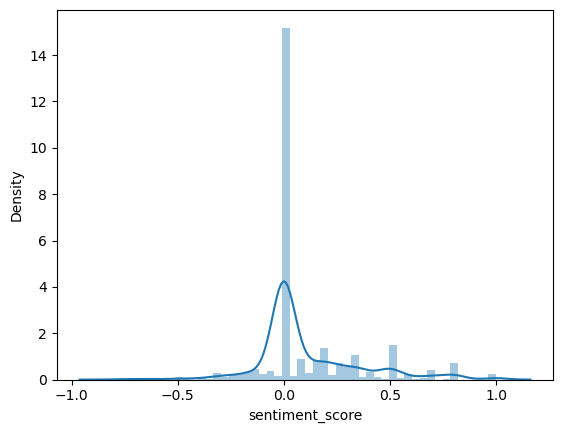

In [37]:
sns.distplot(data['sentiment_score'])
plt.show()

In [39]:
from wordcloud import WordCloud

In [40]:
all=" ".join(data['Text'])


In [43]:
word=WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color="black").generate(all)


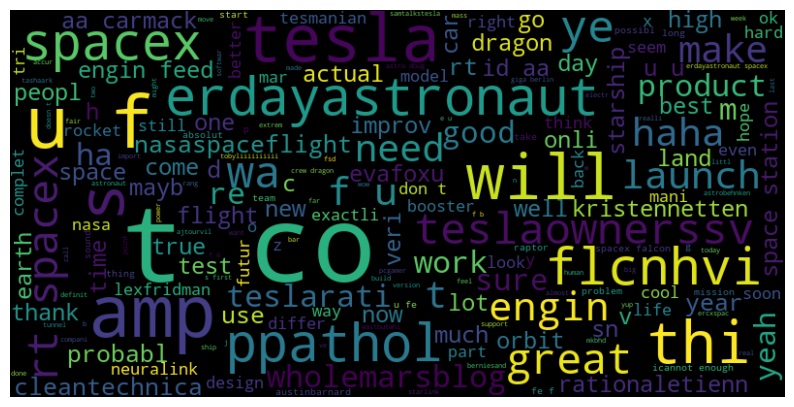

In [44]:
plt.figure(figsize=(10,7))
plt.imshow(word,interpolation="bilinear")
plt.axis('off')
plt.show()